In [20]:
# Load Libaries Needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [21]:
# Read the data
df=pd.read_csv('vgsales.csv',index_col='Rank')
# Print the first 5 rows
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [22]:
# Look at all the variables in the columns
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [23]:
#Explore the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [24]:
# Get a snapshot of the data's central tendencies 
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


/Users/shailmirpuri/opt/anaconda3/envs/vgsales_predict/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Global Sales for Video Games')

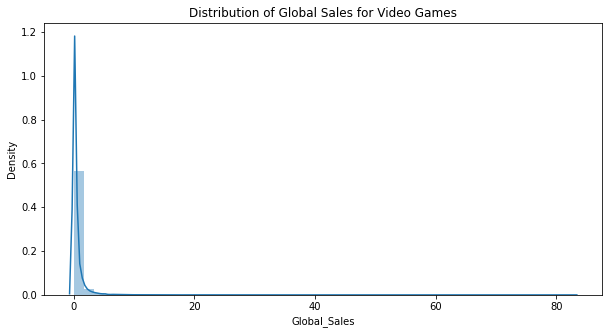

In [25]:
# Let's see how the Global Sales are distritubed for all the data 
f,ax=plt.subplots(figsize=(10,5))
sns.distplot(df['Global_Sales'])
plt.title("Distribution of Global Sales for Video Games")

In [26]:
# Calculate Skewness and Kurtosis 
print ("Skewness: " + str(df['Global_Sales'].skew()))
print ("Kurtosis: "+str(df['Global_Sales'].kurtosis()))

Skewness: 17.400645097552452
Kurtosis: 603.9323461595934


We can see from the plot above that the Global Sales for video games is significantly right skewed with a heavy tail. This may indicate that most video games are quite relatively unsuccessful, however there are few that really break out and have a ton of success.

In addition to this, the large value for Kurtosis indicates the presence of outliers. This is something we will need to consider later when making our model.

# Exploring the breakdown of all the numerical and categorical variables

## Numerical Variables:
We will create distribution plots to see how each of these are spread out in our dataset.
We will analyse the correlation between these variables

## Categorical Variables:
We will create bar charts to see the distrbution of the data broken down by different variables

/Users/shailmirpuri/opt/anaconda3/envs/vgsales_predict/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/shailmirpuri/opt/anaconda3/envs/vgsales_predict/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/shailmirpuri/opt/anaconda3/envs/vgsales_predict/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Plea

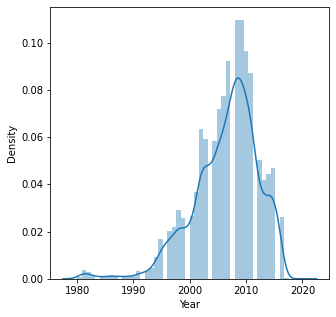

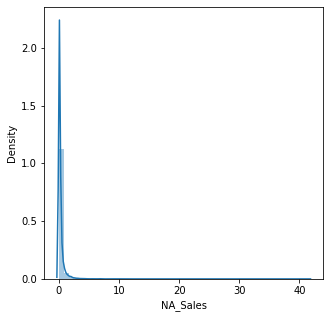

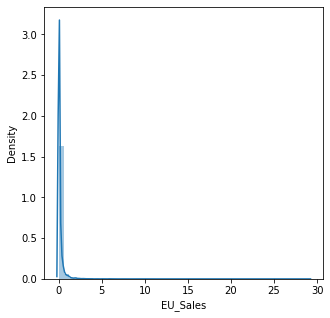

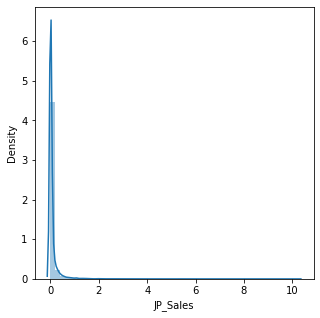

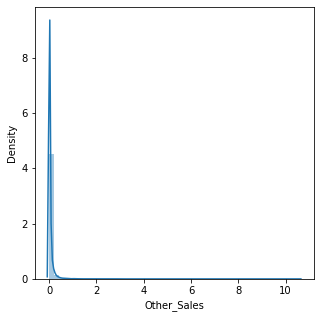

In [27]:
#Numerical Variables 
num= ['Year','NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
df_num=df[num]
for var in df_num:
    if var!='Global_Sales':
        f,ax=plt.subplots(figsize=(5,5))
        sns.distplot(df_num[var])

In [28]:
for var in df_num: 
    if var != "Global_Sales":
        print ('Skewness for '+ var + ' is: '+ str(df[var].skew()))
        print ('Kurtosis for '+ var + ' is: '+ str(df[var].kurtosis()))

Skewness for Year is: -1.002560494621347
Kurtosis for Year is: 1.8481805519965588
Skewness for NA_Sales is: 18.799627403792297
Kurtosis for NA_Sales is: 649.1302677259322
Skewness for EU_Sales is: 18.875535100538038
Kurtosis for EU_Sales is: 756.0277957655502
Skewness for JP_Sales is: 11.206458372215543
Kurtosis for JP_Sales is: 194.23399366140464
Skewness for Other_Sales is: 24.233922531429613
Kurtosis for Other_Sales is: 1025.3481445011175


<AxesSubplot:>

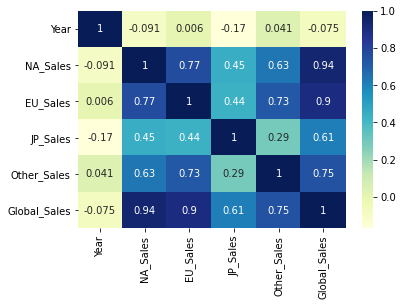

In [29]:
#Calculate Correlation between numeric variables
sns.heatmap(df_num.corr(),annot=True,cmap="YlGnBu")

/Users/shailmirpuri/opt/anaconda3/envs/vgsales_predict/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


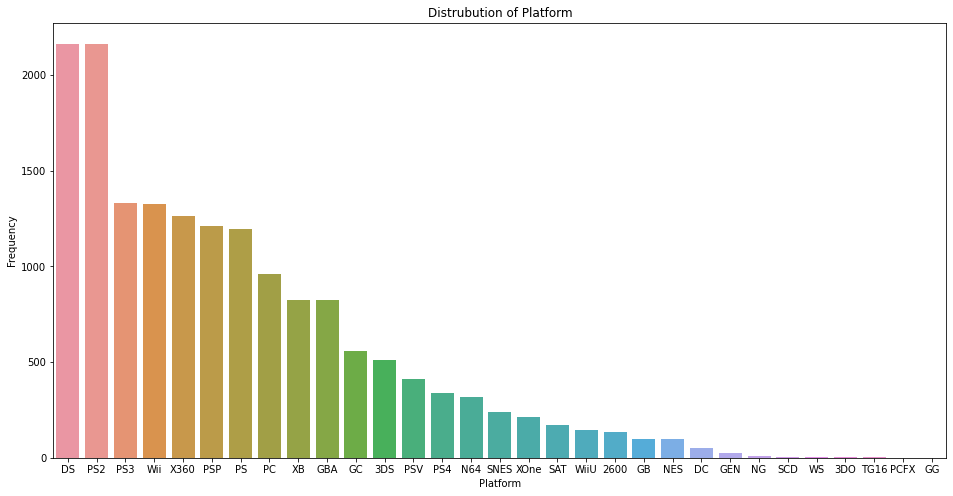

/Users/shailmirpuri/opt/anaconda3/envs/vgsales_predict/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


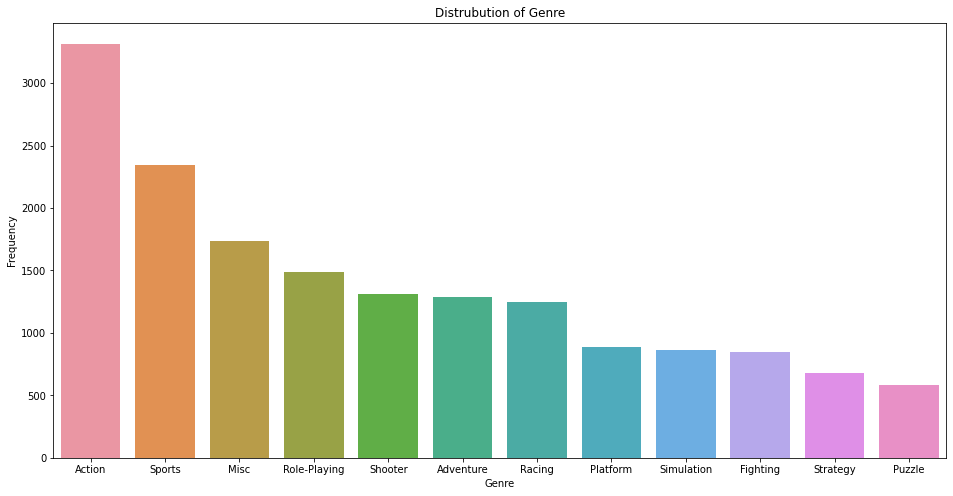

/Users/shailmirpuri/opt/anaconda3/envs/vgsales_predict/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


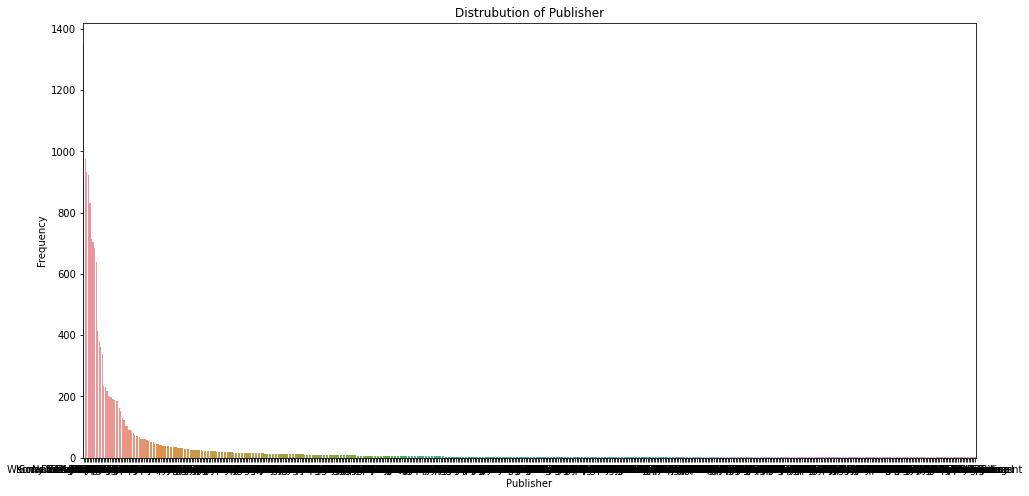

In [30]:
#Categorical Variables
cat=['Platform','Genre', 'Publisher']
df_cat=df[cat]
for var in df_cat:
    f,ax=plt.subplots(figsize=(16,8))
    sns.barplot(df_cat[var].value_counts().index,df_cat[var].value_counts()).set_title('Distrubution of ' + var)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

# Exploratory Data Analysis

We shall explore some key themes in this dataset:

1. Sales across different platforms 
2. Sales over the years
3. Genres that are the best selling
4. Most successful publishers
5. Comparing the sales data for games in the total series (FIFA, Call of Duty, GTA, etc.)
6. Console vs. Portable Device Video Game Sales

/Users/shailmirpuri/opt/anaconda3/envs/vgsales_predict/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


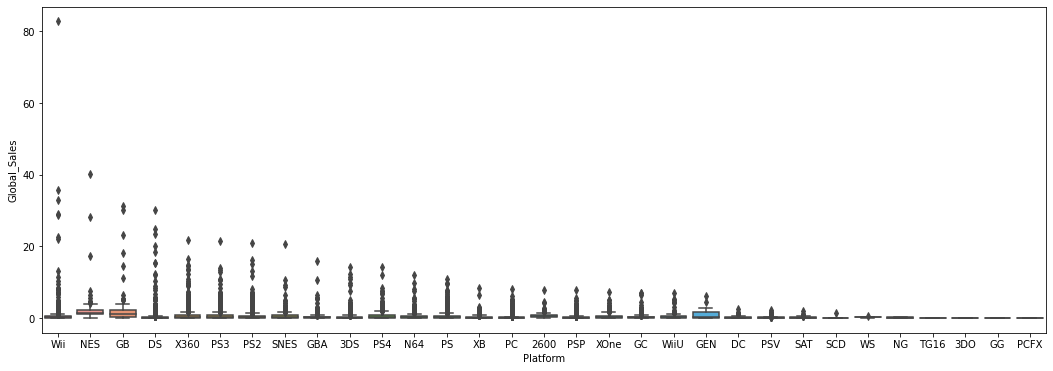

<ipython-input-31-57617ff78b65>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2=df.groupby(['Platform'])['Platform','Global_Sales'].mean().sort_values(by='Global_Sales', ascending=False).reset_index()


,Platform,Global_Sales
0,GB,2.606633
1,NES,2.561939
2,GEN,1.050370
3,SNES,0.837029
4,PS4,0.827679
5,X360,0.774672
6,2600,0.729925
7,PS3,0.720722
8,Wii,0.699404
9,N64,0.686144


In [31]:
# Sales across different platforms:
f,ax=plt.subplots(figsize=(18,6))
sns.boxplot(df['Platform'],df['Global_Sales'])
plt.show()

#Calculate average sale price for each platform:
df2=df.groupby(['Platform'])['Platform','Global_Sales'].mean().sort_values(by='Global_Sales', ascending=False).reset_index()
df2

      Year  Global_Sales
0   1989.0      4.320588
1   1985.0      3.852857
2   1984.0      3.597143
3   1988.0      3.148000
4   1990.0      3.086875
5   1992.0      1.771163
6   1986.0      1.765238
7   1987.0      1.358750
8   1980.0      1.264444
9   1983.0      0.987647
10  1982.0      0.801667
11  1991.0      0.786098
12  1981.0      0.777609
13  1993.0      0.766333
14  1996.0      0.757224
15  1999.0      0.743402
16  1997.0      0.695433
17  2001.0      0.687697
18  1998.0      0.676702
19  2013.0      0.674194
20  1994.0      0.654298
21  2014.0      0.579124
22  2000.0      0.577536
23  2012.0      0.553333
24  2004.0      0.549554
25  2006.0      0.516905
26  2007.0      0.508428
27  2005.0      0.488778
28  2002.0      0.477105
29  2010.0      0.476926
30  2008.0      0.475420
31  2009.0      0.466317
32  2003.0      0.461742
33  2011.0      0.453020
34  2015.0      0.430684
35  1995.0      0.402329
36  2020.0      0.290000
37  2016.0      0.206192
38  2017.0      0.016667


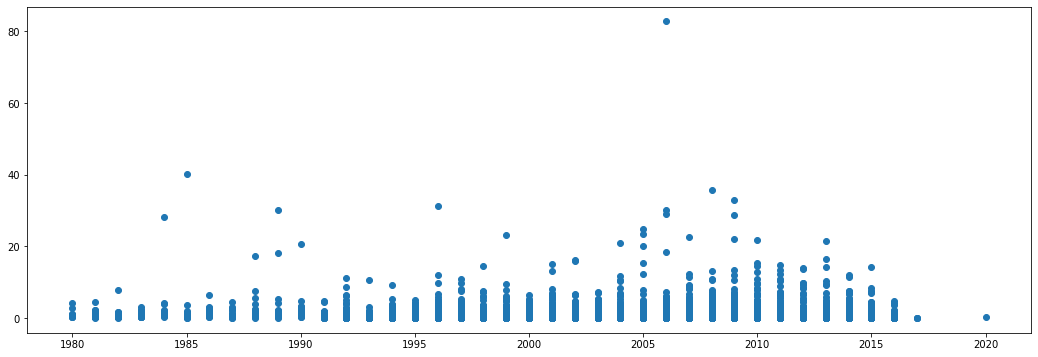

In [32]:
# Sales over the years 
df3 =df.groupby(['Year'])['Global_Sales'].mean().sort_values(ascending=False).reset_index()
print(df3)

# Scatter Plot
f,ax=plt.subplots(figsize=(18,6))
plt.scatter(df['Year'],df['Global_Sales'])

           Genre  Global_Sales
0       Platform         0.280
1        Shooter         0.230
2         Sports         0.220
3       Fighting         0.210
4         Action         0.190
5         Racing         0.190
6   Role-Playing         0.185
7           Misc         0.160
8     Simulation         0.160
9         Puzzle         0.110
10      Strategy         0.090
11     Adventure         0.060


<ipython-input-33-cab814f716b5>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df4 =df.groupby(['Genre'])['Genre','Global_Sales'].median().sort_values(by='Global_Sales', ascending=False).reset_index()
/Users/shailmirpuri/opt/anaconda3/envs/vgsales_predict/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Genre,Global_Sales
0,Platform,0.280
1,Shooter,0.230
2,Sports,0.220
3,Fighting,0.210
4,Action,0.190
5,Racing,0.190
6,Role-Playing,0.185
7,Misc,0.160
8,Simulation,0.160
9,Puzzle,0.110


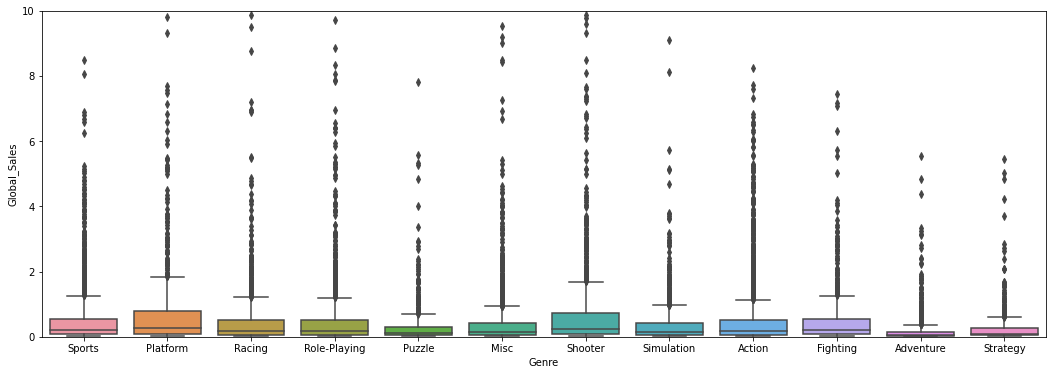

In [33]:
# Best Selling Genres:
df4 =df.groupby(['Genre'])['Genre','Global_Sales'].median().sort_values(by='Global_Sales', ascending=False).reset_index()
print(df4)

# Boxplot comparison between genres
f,ax=plt.subplots(figsize=(18,6))
sns.boxplot(df['Genre'],df['Global_Sales'])
plt.ylim([0,10])

df4

<ipython-input-34-fefbebde42b5>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df5 =df.groupby(['Publisher'])['Publisher','Global_Sales'].mean().sort_values(by='Global_Sales', ascending=False).reset_index()


                            Publisher  Global_Sales
0                              Palcom      4.170000
1                             Red Orb      2.620000
2                            Nintendo      2.541337
3                 Arena Entertainment      2.360000
4                         UEP Systems      2.250000
5                           RedOctane      2.170000
6                               Valve      1.740000
7                         Hello Games      1.600000
8  Sony Computer Entertainment Europe      1.592667
9                    Westwood Studios      1.550000


/Users/shailmirpuri/opt/anaconda3/envs/vgsales_predict/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Publisher', ylabel='Global_Sales'>

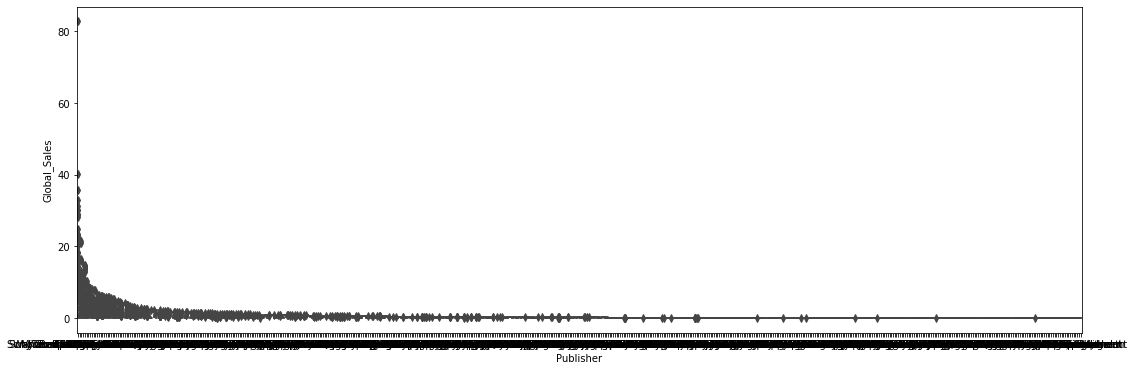

In [34]:
# Most Successful Publishers:
df5 =df.groupby(['Publisher'])['Publisher','Global_Sales'].mean().sort_values(by='Global_Sales', ascending=False).reset_index()
print(df5.head(10))

# Boxplot comparing Publishers:
f,ax=plt.subplots(figsize=(18,6))
sns.boxplot(df['Publisher'],df['Global_Sales'])

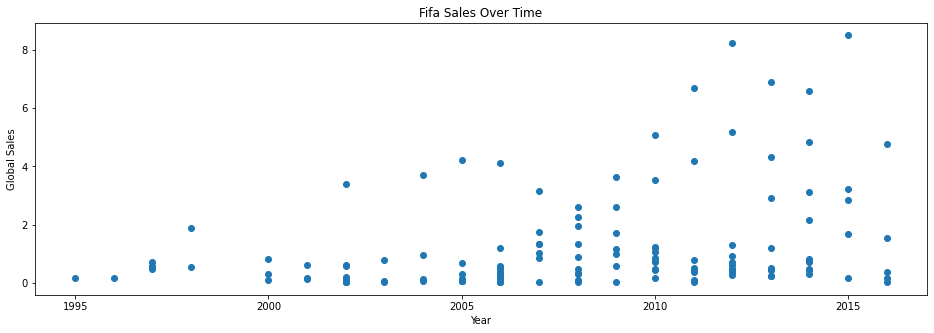

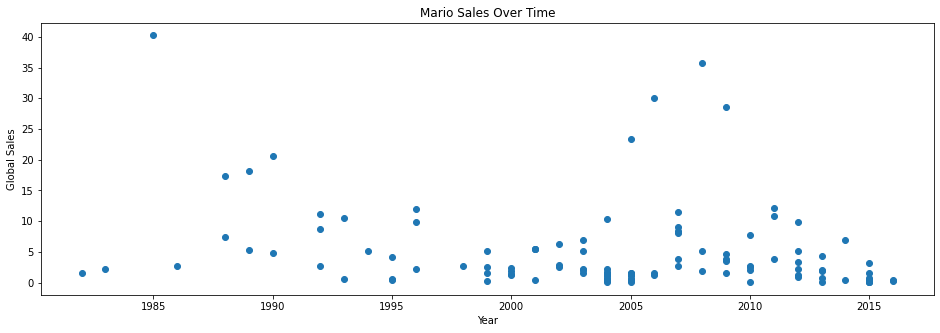

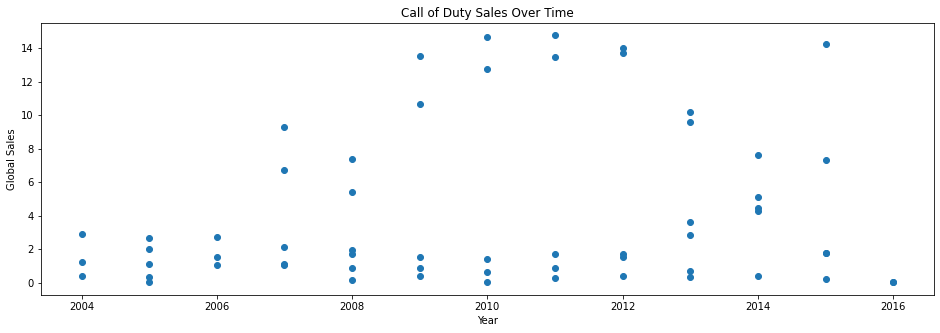

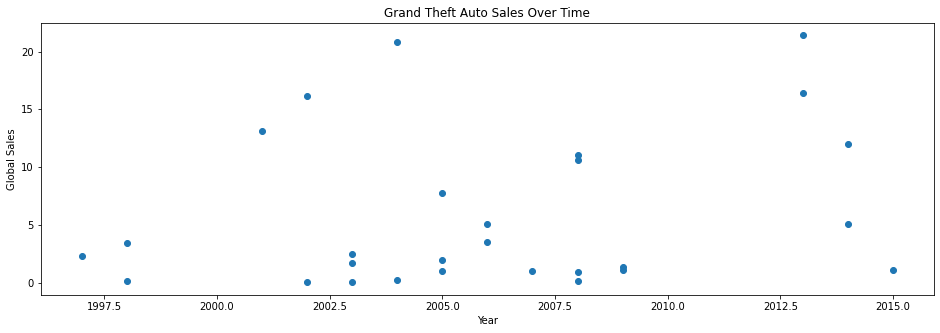

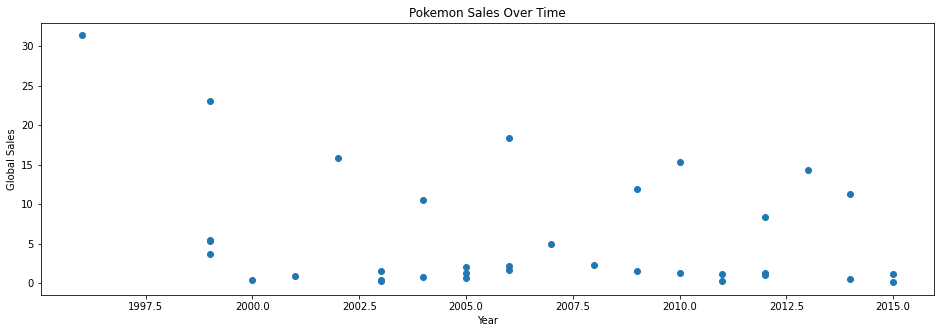

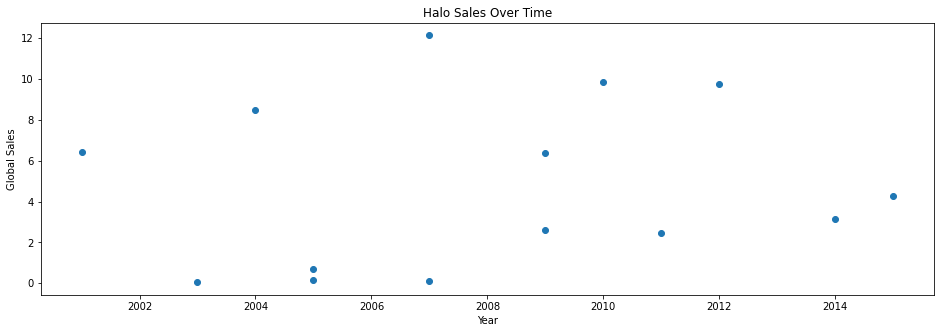

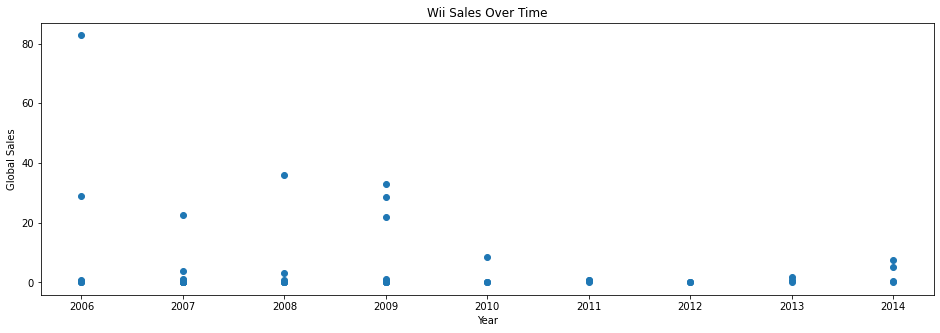

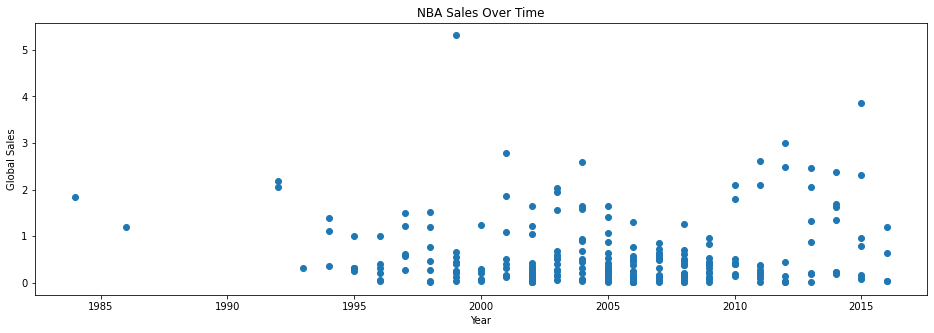

In [35]:
# Comparing Sales of Major Game Series
series=['Fifa','Mario','Call of Duty','Grand Theft Auto', 'Pokemon','Halo','Wii','NBA']

for ser in series:
    M = df[df['Name'].str.contains(ser, regex=False, case=False, na=False)].copy()
    f,ax=plt.subplots(figsize=(16,5))
    plt.scatter(M['Year'],M['Global_Sales'])
    plt.title(ser+' Sales Over Time')
    plt.xlabel('Year')
    plt.ylabel('Global Sales')
    plt.show()

In [36]:
# Compare average sales for each major game series
series=['Fifa','Mario','Call of Duty','Grand Theft Auto', 'Pokemon','Halo','Wii','NBA']
game_series={}
for ser in series:
    M = df[df['Name'].str.contains(ser, regex=False, case=False, na=False)].copy()
    average= round(M['Global_Sales'].median(),2)
    correlation=M['Global_Sales'].corr(M['Year'])
    rounded_corr=round(correlation,2)
    print('The Median For {} Series is {}, its Correlation with Years is {}'.format(ser,average,rounded_corr))
    game_series[ser]=[average,correlation]
df_series=pd.DataFrame.from_dict(game_series, orient='index',columns=['Median Global Sales','Correlation With Years'])

The Median For Fifa Series is 0.52, its Correlation with Years is 0.32
The Median For Mario Series is 2.27, its Correlation with Years is -0.24
The Median For Call of Duty Series is 1.74, its Correlation with Years is 0.18
The Median For Grand Theft Auto Series is 2.41, its Correlation with Years is 0.25
The Median For Pokemon Series is 1.61, its Correlation with Years is -0.28
The Median For Halo Series is 3.7, its Correlation with Years is 0.13
The Median For Wii Series is 0.29, its Correlation with Years is -0.17
The Median For NBA Series is 0.32, its Correlation with Years is -0.0


In [37]:
df_series.sort_values(by=['Median Global Sales'], ascending=False)

,Median Global Sales,Correlation With Years
Halo,3.70,0.134135
Grand Theft Auto,2.41,0.249476
Mario,2.27,-0.238100
Call of Duty,1.74,0.181410
Pokemon,1.61,-0.281175
Fifa,0.52,0.324477
NBA,0.32,-0.000539
Wii,0.29,-0.166864


['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


/Users/shailmirpuri/opt/anaconda3/envs/vgsales_predict/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


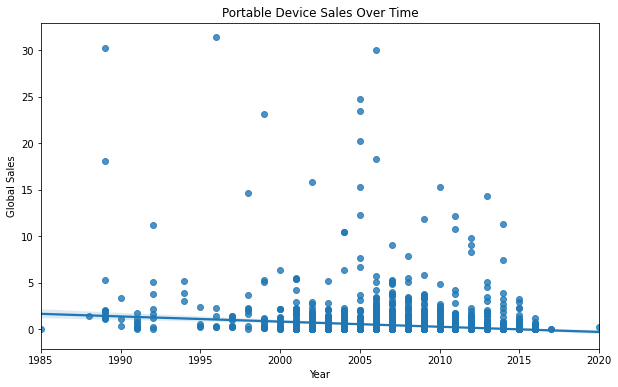

The Median Sales for Portable devices is 0.11


/Users/shailmirpuri/opt/anaconda3/envs/vgsales_predict/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


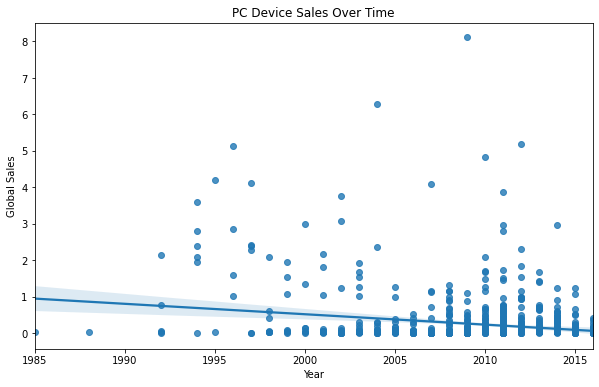

The Median Sales for PC devices is 0.04


/Users/shailmirpuri/opt/anaconda3/envs/vgsales_predict/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


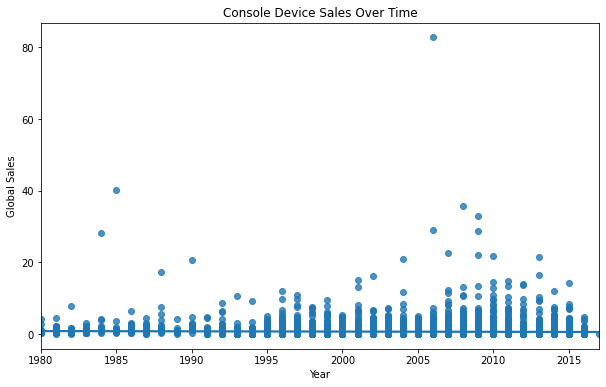

The Median Sales for Console devices is 0.23


In [38]:
# Compare Type of Device Game Sales 
print(df['Platform'].unique())
# 3 types: Portable, PC and Console
PC=['PC']
Portable = ['GB','DS','GBA','3DS','PSP','PSV','WS','GG']
df_portable=df[(df.Platform =='GB')|(df.Platform =='DS')|(df.Platform =='GBA')|(df.Platform =='3DS')|(df.Platform =='PSP')|(df.Platform =='PSV')
              |(df.Platform =='WS')|(df.Platform =='GG')]
df_PC=df[(df.Platform=='PC')]

df_console= df[(df.Platform =='Wii')|(df.Platform =='NES')|(df.Platform =='X360')|(df.Platform =='PS3')|(df.Platform =='PS2')|(df.Platform =='SNES')
              |(df.Platform =='PS4')|(df.Platform =='N64')|(df.Platform =='PS')|(df.Platform =='XB')|(df.Platform =='2600')|(df.Platform =='XOne')
             |(df.Platform =='GC')|(df.Platform =='WiiU')|(df.Platform =='GEN')|(df.Platform =='DC')
            |(df.Platform =='SAT')|(df.Platform =='SCD')|(df.Platform =='NG')|(df.Platform =='TG16')|(df.Platform =='3DO')
            |(df.Platform =='PCFX')]
devi={}
d={'Portable':df_portable,'PC': df_PC,'Console':df_console}
for name,n in d.items():
    f,ax=plt.subplots(figsize=(10,6))
    sns.regplot(n['Year'],n['Global_Sales'])
    plt.title(name + ' Device Sales Over Time')
    plt.xlabel('Year')
    plt.ylabel('Global Sales')
    plt.show()
    average= n['Global_Sales'].median()
    correlation=n['Global_Sales'].corr(n['Year'])
    print ("The Median Sales for {} devices is {}".format(name,average))
    devi[name]=[average,correlation]

In [39]:
df_device=pd.DataFrame.from_dict(devi, orient='index',columns=['Median Global Sales','Correlation With Years'])
df_device.sort_values(by=['Median Global Sales'], ascending=False)

,Median Global Sales,Correlation With Years
Console,0.23,-0.025321
Portable,0.11,-0.159955
PC,0.04,-0.190523


# **Feature Engineering**

1. Whether it is released on a Console, Portable device or PC
2. The game series it is apart of (We consider the ones we performed EDA on)
3. Percentage of Total Sales Per Region

In [40]:
len(df['Platform'])

16598

In [41]:
#Console, Portable or PC
Device=[]
for i in range(0,16598):
    if df['Platform'].iloc[i] in Portable:
        Device.append('Portable')
    elif df['Platform'].iloc[i] in PC:
        Device.append('PC')
    else:
        Device.append('Console')
df['Device']=Device
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Device
Rank,,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Console
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Console
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Console
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Console
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Portable


In [42]:
# Adding Feature of Game Series
series=['FIFA','Mario','Call of Duty','Grand Theft Auto', 'Pokemon','Halo','Wii','NBA']
for ser in series:
    df[ser]=df['Name'].str.contains(ser, regex=False, case=False, na=False)
df.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Device,FIFA,Mario,Call of Duty,Grand Theft Auto,Pokemon,Halo,Wii,NBA
Rank,,,,,,,,,,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Console,False,False,False,False,False,False,True,False
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Console,False,True,False,False,False,False,False,False
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Console,False,True,False,False,False,False,True,False
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Console,False,False,False,False,False,False,True,False
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Portable,False,False,False,False,True,False,False,False
6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,Portable,False,False,False,False,False,False,False,False
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,Portable,False,True,False,False,False,False,False,False
8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,Console,False,False,False,False,False,False,True,False
9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,Console,False,True,False,False,False,False,True,False


In [43]:
# Percentage of Total Sales Per Region
regions_sales=['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
for reg in regions_sales:
    A=df[reg]
    B=df['Global_Sales']
    df[reg+' As a percentage of Total']=round(100*(A/B),2)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,Call of Duty,Grand Theft Auto,Pokemon,Halo,Wii,NBA,NA_Sales As a percentage of Total,EU_Sales As a percentage of Total,JP_Sales As a percentage of Total,Other_Sales As a percentage of Total
Rank,,,,,,,,,,,,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,...,False,False,False,False,True,False,50.15,35.07,4.56,10.22
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,...,False,False,False,False,False,False,72.27,8.90,16.92,1.91
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,...,False,False,False,False,True,False,44.25,35.96,10.58,9.24
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,...,False,False,False,False,True,False,47.73,33.36,9.94,8.97
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,...,False,False,True,False,False,False,35.93,28.34,32.58,3.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,...,False,False,False,False,False,False,100.00,0.00,0.00,0.00
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,...,False,False,False,False,False,False,100.00,0.00,0.00,0.00
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,...,False,False,False,False,False,False,0.00,0.00,0.00,0.00


# Data Pre-processing for Model 

Now that we have engineered 3 features that better represent our variables better. Let's start pre-processing the data so that we can apply our model to it:

We will ignore the Video Game's Name and Platform from our dataset as we have feature engineered these variables into more useful ones.

We will also ignore the gross number of region sales and instead look at each as a percentage of the total. This is because the gross region sales are highly correlated with the global sales since they actually make it up. Therefore, if left this in our model since it would be a data leakage for our target variable. Despite this, it would be interesting to see if the distrbution of sales by region impacts the actual Global Sales number. Thus, we will look at this through expressing it as a percentage of global sales. 

Finally, we will also not include the publisher name as when we deploy our model to a web application, it will be hard to predict new games produced by publishers that our model has not seen before.  


  

In [44]:
df_ml=df.copy()

In [45]:
# Splitting Data into input and output variables
features= ['Year', 'Genre','Device',
       'FIFA', 'Mario', 'Call of Duty', 'Grand Theft Auto', 'Pokemon', 'Halo',
       'Wii', 'NBA', 'NA_Sales As a percentage of Total',
       'EU_Sales As a percentage of Total',
       'JP_Sales As a percentage of Total',
       'Other_Sales As a percentage of Total']
cat_features= ['Genre', 'Publisher','Device']       
num_features=['Year','NA_Sales As a percentage of Total',
       'EU_Sales As a percentage of Total',
       'JP_Sales As a percentage of Total',
       'Other_Sales As a percentage of Total']
bool_features=['FIFA', 'Mario', 'Call of Duty', 'Grand Theft Auto', 'Pokemon', 'Halo',
       'Wii', 'NBA']

In [46]:
# Checking for Missing values
df_ml.isnull().sum()

Name                                      0
Platform                                  0
Year                                    271
Genre                                     0
Publisher                                58
NA_Sales                                  0
EU_Sales                                  0
JP_Sales                                  0
Other_Sales                               0
Global_Sales                              0
Device                                    0
FIFA                                      0
Mario                                     0
Call of Duty                              0
Grand Theft Auto                          0
Pokemon                                   0
Halo                                      0
Wii                                       0
NBA                                       0
NA_Sales As a percentage of Total         0
EU_Sales As a percentage of Total         0
JP_Sales As a percentage of Total         0
Other_Sales As a percentage of T

In [47]:
# For those with Publishers as NaN we will fill them with unknown
df_ml.Publisher.fillna('Unknown',inplace=True)

In [48]:
df_ml[bool_features]=df_ml[bool_features].astype('int')

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_ml[features], df_ml['Global_Sales'], test_size=0.1, random_state=2)

In [ ]:
# Export our preprocessed data
X_train.to_csv('X_train.csv')
X_test.to_csv('X_test.csv') 
y_train.to_csv('y_train.csv') 
y_test.to_csv('y_test.csv')